# PUC Minas - Pontifícia Universidade Católica de Minas Gerais #

### Pós Graduação em Inteligência Artificial e Aprendizado de Máquina ###
### Trabalho Conclusão de Curso ###

**Título:** DETECÇÃO DE SINAIS DE LIBRAS EM TEMPO REAL USANDO VISÃO COMPUTACIONAL

**Aluno:** Rafael Vieira Martins

**Matrícula:** 1190227

### 1 -Importando as bibliotecas ###

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import os
from matplotlib import pyplot as plt

### 2 - Mapeamento dos Pontos Chaves Usando do MediaPipe ###

A documentação do MediaPipe pode ser consultado no seguinte endereço:
https://developers.google.com/mediapipe/solutions

In [2]:
mp_holistic = mp.solutions.holistic #Modelo Mediapipe Holistic
mp_drawing = mp.solutions.drawing_utils #Plota ferramentas

In [3]:
def mediapipe_detector(imagem, model):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) #Converte BGR paara RGB
    imagem.flags.writeable = False                  #Torna a imagem não editável ( economia de memória)
    results = model.process(imagem)                 # Faz a predição
    imagem.flags.writeable = True                   # Torna a imagem editável
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR) #Reconverte RGB paara BGR(CV2)
    return imagem, results

In [4]:
def renderiza_landmarks(imagem, resultado):
    #Renderiza rosto
    mp_drawing.draw_landmarks(imagem, resultado.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                              ) 
    #Renderiza corpo
    mp_drawing.draw_landmarks(imagem, resultado.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                              )
    #Renderiza mão esquerda  
    mp_drawing.draw_landmarks(imagem, resultado.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                              )
    #Renderiza mão direita  
    mp_drawing.draw_landmarks(imagem, resultado.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                              ) 

Testando a captura de imagem e pontos chave

In [5]:
#Cria o objeto da câmera (o 0 é o dispositivo webcam, caso vá usar outro mudar) - Holistic = MediaPipe Holistic
captura = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while captura.isOpened():
        #Lê a captura
        ret, frame = captura.read()
        #Realiza Detecção do frame
        imagem, resultado = mediapipe_detector(frame, holistic)
        print(resultado)
        #Renderiza os pontos 
        renderiza_landmarks(imagem, resultado)

        #Mostra a janela
        cv2.imshow('Janela OpenCV', imagem)
        #Para a execução da câmera
        if cv2.waitKey(10) & 0xFF == ord('q'): #Para sair apertar q 
            break

captura.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
#Imprime resultado das detecções
resultado.left_hand_landmarks

In [7]:
# Capturando o mapa dos pontos de interesse

face_capture = resultado.face_landmarks
left_hand_caputure = resultado.left_hand_landmarks
right_hand_capture = resultado.right_hand_landmarks

In [9]:
right_hand_capture.landmark

[x: 0.18876537680625916
y: 0.7314726710319519
z: 5.174406965124945e-07
, x: 0.2638469636440277
y: 0.7109227180480957
z: -0.042413391172885895
, x: 0.3237941861152649
y: 0.6566694974899292
z: -0.06251168996095657
, x: 0.3686351776123047
y: 0.6049960851669312
z: -0.07986205816268921
, x: 0.41582173109054565
y: 0.5932866930961609
z: -0.09614081680774689
, x: 0.2881227433681488
y: 0.4995949864387512
z: -0.0247291661798954
, x: 0.3084406554698944
y: 0.4169648289680481
z: -0.04190254211425781
, x: 0.31763848662376404
y: 0.36159777641296387
z: -0.05852949246764183
, x: 0.32406455278396606
y: 0.31262069940567017
z: -0.07240086048841476
, x: 0.24376484751701355
y: 0.4779897630214691
z: -0.02033529244363308
, x: 0.24823234975337982
y: 0.37903687357902527
z: -0.034283921122550964
, x: 0.24772241711616516
y: 0.31711694598197937
z: -0.04800280183553696
, x: 0.24671010673046112
y: 0.2624935507774353
z: -0.05881420522928238
, x: 0.20126742124557495
y: 0.48107486963272095
z: -0.021671196445822716
, x:

In [10]:
renderiza_landmarks(frame,resultado)

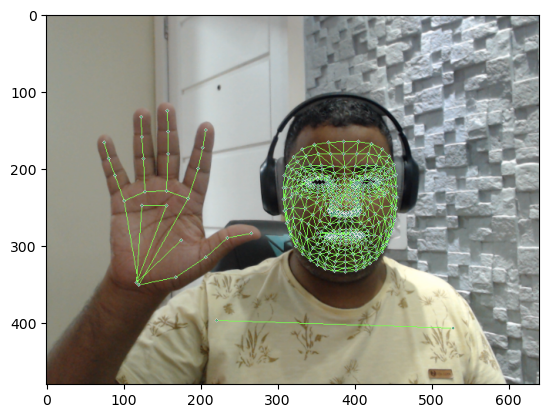

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

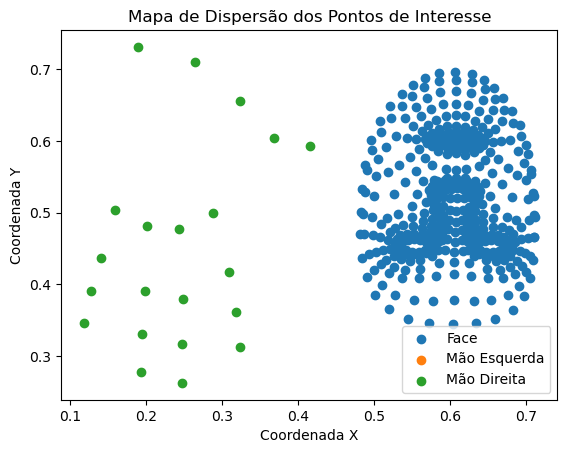

In [12]:
# Extrair coordenadas x e y do rosto
if face_capture:
    face_x = [point.x for point in face_capture.landmark]
    face_y = [point.y for point in face_capture.landmark]
else:
    face_x, face_y = [], []

# Verificar se os landmarks da mão esquerda foram detectados
if left_hand_caputure:
    left_hand_x = [point.x for point in left_hand_caputure.landmark]
    left_hand_y = [point.y for point in left_hand_caputure.landmark]
else:
    left_hand_x, left_hand_y = [], []

# Verificar se os landmarks da mão direita foram detectados
if right_hand_capture:
    right_hand_x = [point.x for point in right_hand_capture.landmark]
    right_hand_y = [point.y for point in right_hand_capture.landmark]
else:
    right_hand_x, right_hand_y = [], []

# Criar o mapa de dispersão
plt.scatter(face_x, face_y, label='Face')
plt.scatter(left_hand_x, left_hand_y, label='Mão Esquerda')
plt.scatter(right_hand_x, right_hand_y, label='Mão Direita')

# Adicionar rótulos e legenda
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mapa de Dispersão dos Pontos de Interesse')
plt.legend()

# Mostrar o gráfico
plt.show()



### 3 - Extraindo os valores dos ponto chave ###

In [13]:
resultado.pose_landmarks.landmark[0] #Resultado da primeira detecção de face

x: 0.5963767766952515
y: 0.516565203666687
z: -0.9069701433181763
visibility: 0.9998388886451721

In [14]:
len(resultado.face_landmarks.landmark)

468

In [15]:
#Função detecta as coordenadas dos pontos chave e os transforma em um array único de 1662 valores ( os não encontrados são preenchidos com valor 0)
def extrai_valores_chave(resultado):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in resultado.pose_landmarks.landmark]).flatten() if resultado.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in resultado.face_landmarks.landmark]).flatten() if resultado.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in resultado.left_hand_landmarks.landmark]).flatten() if resultado.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in resultado.right_hand_landmarks.landmark]).flatten() if resultado.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [16]:
#Testando o resultado da função
teste_resultado = extrai_valores_chave(resultado).shape
np.save('1',teste_resultado)
np.load('1.npy')

array([1662])

### 4 - Montando a Estrutura de Arquivos ###

In [21]:
#Pasta para dados exportados e arrays numpy
DATA_PATH = os.path.join('dados_coletados')

#Gestos que serão detectados
gestos = np.array(['bom', 'dia', 'tarde','noite'])

#Número de vídeos
numero_sequencias = 30
#Número de frames por vídeo
numero_frames = 30


In [22]:
for gesto in gestos:
    for sequencia in range(numero_sequencias):
        try:
            os.makedirs(os.path.join(DATA_PATH, gesto, str(sequencia)))
        except OSError as e:
            pass

### 5 - Coletando Gestos ###

In [ ]:
#Cria o objeto da câmera (o 0 é o dispositivo webcam, caso vá usar outro mudar) - Holistic = MediaPipe Holistic
captura = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Loop controlado numero de gestos
    for gesto in gestos:
        #Loop controlado por numero de sequencias
        for sequencia in range(numero_sequencias):
            #Loop por numero de frames(fotos)
            for foto in range(numero_frames):

                #Lê a captura
                ret, frame = captura.read()
                #Realiza Detecção do frame
                imagem, resultado = mediapipe_detector(frame, holistic)
                print(resultado)
                #Renderiza os pontos 
                renderiza_landmarks(imagem, resultado)

                #Imprimindo sequencia e lógica de espera para os quadros
                if foto == 0:
                    cv2.putText(imagem, 'INICIANDO COLETA', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
                    cv2.putText(imagem, 'Coletando frames do {} - vídeo número {}'.format(gesto, sequencia), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(imagem, 'Coletando frames do {} - vídeo número {}'.format(gesto, sequencia), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                     
                
                # Exporta os valores chave
                valores_chave = extrai_valores_chave(resultado)
                caminho_npy = os.path.join(DATA_PATH, gesto, str(sequencia), str(foto))
                np.save(caminho_npy, valores_chave)

                #Salva as imagens nos mesmos diretórios
                caminho_imagem = os.path.join(DATA_PATH, gesto, str(sequencia), str(foto) + ".jpg")
                cv2.imwrite(caminho_imagem, imagem)
                
                #Mostra a janela
                cv2.imshow('Janela OpenCV', imagem)

                #Para a execução da câmera
                if cv2.waitKey(10) & 0xFF == ord('q'): #Para sair apertar q 
                    break

captura.release()
cv2.destroyAllWindows()

### 6- Processamento dos Dados e Criação das Labels e Features ###

In [19]:
# Libs úteis para dividir o conjunto em treino/teste e também rotular as features 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
#Cria um mapa IDs para os rótulos numerado para cada uma das categorias 
label_map = {label: num for num, label in enumerate(gestos)}

In [24]:
label_map

{'bom': 0, 'dia': 1, 'tarde': 2, 'noite': 3}

In [25]:
# "Organiza" a sequencia gestos em "filmes" de 30 frames cada 
sequencias, rotulos = [], []

for gesto in gestos:
    for sequencia in range(numero_sequencias):
        janela = []
        for foto in range(numero_frames):
            res = np.load(os.path.join(DATA_PATH, gesto, str(sequencia), "{}.npy".format(foto)))
            janela.append(res)
        sequencias.append(janela)
        rotulos.append(label_map[gesto])

In [26]:
# N gestos x 30 sequencias, numeros de frames, número total de coordenadas de pontos de interesse
np.array(sequencias).shape

(120, 30, 1662)

In [27]:
#Número de rótulos
np.array(rotulos).shape

(120,)

In [28]:
#Atribui a X o valor da var sequencias ( Transforma em um nparray para processar no modelo)
X = np.array(sequencias)
X.shape

(120, 30, 1662)

In [29]:
#transforma os rótulos no formato One Hot Encoding (OHE) 
y = to_categorical(rotulos).astype(int)
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [31]:
X_test.shape

(24, 30, 1662)

### 7 - Construir uma LSTM (Long Short Therm Memory) e Treinar a Rede ###

In [32]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [33]:
# Separe seu conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defina uma função para criar o modelo com os hiperparâmetros desejados
def create_lstm_model(units=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, activation=activation, input_shape=(30, 1662)))
    model.add(LSTM(units, return_sequences=True, activation=activation))
    model.add(LSTM(units, return_sequences=False, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(gestos.shape[0], activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

# Definição da lista de combinações de hiperparâmetros para testar
param_combinations = [
    {'units': 64, 'activation': 'relu', 'learning_rate': 0.001},
    {'units': 128, 'activation': 'relu', 'learning_rate': 0.001},
    {'units': 256, 'activation': 'relu', 'learning_rate': 0.001},
    {'units': 64, 'activation': 'tanh', 'learning_rate': 0.001},
    {'units': 128, 'activation': 'tanh', 'learning_rate': 0.001},
    {'units': 256, 'activation': 'tanh', 'learning_rate': 0.001},
    {'units': 64, 'activation': 'relu', 'learning_rate': 0.0001},
    {'units': 128, 'activation': 'relu', 'learning_rate': 0.001},
    {'units': 256, 'activation': 'relu', 'learning_rate': 0.01},
    
]

best_model = None
best_accuracy = 0.0
best_params = None  # Variável para armazenar os melhores parâmetros

# Faça um loop pelas combinações de hiperparâmetros e avalie o desempenho
for params in param_combinations:
    model = create_lstm_model(units=params['units'], activation=params['activation'], 
                              learning_rate=params['learning_rate'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = params  # Atualize os melhores parâmetros

print(f'Melhor acurácia: {best_accuracy}')
print(f'Melhores parâmetros: {best_params}')




Melhor acurácia: 1.0
Melhores parâmetros: {'units': 64, 'activation': 'tanh', 'learning_rate': 0.001}


In [34]:

# Monta o modelo com os melhores parâmetros
model = create_lstm_model(units=best_params['units'], 
                          activation=best_params['activation'], 
                          learning_rate=best_params['learning_rate'])

# Treina o modelo com os dados de treinamento e guarda o histórico de treinamento
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Obtém as perdas e acuracia do treinamento e da validação
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acuracy = history.history['categorical_accuracy']
val_acuracy = history.history['val_categorical_accuracy']

# Cria um array com o número de épocas para imprimir a curva de loss
epochs = range(1, len(train_loss) + 1)


Epoch 1/150
3/3 [==============================] - 4s 473ms/step - loss: 1.4049 - categorical_accuracy: 0.2917 - val_loss: 1.3306 - val_categorical_accuracy: 0.4583
Epoch 2/150
3/3 [==============================] - 0s 59ms/step - loss: 1.3151 - categorical_accuracy: 0.3750 - val_loss: 1.1744 - val_categorical_accuracy: 0.5417
Epoch 3/150
3/3 [==============================] - 0s 55ms/step - loss: 1.1559 - categorical_accuracy: 0.4479 - val_loss: 1.1904 - val_categorical_accuracy: 0.3750
Epoch 4/150
3/3 [==============================] - 0s 65ms/step - loss: 1.0447 - categorical_accuracy: 0.5417 - val_loss: 1.0462 - val_categorical_accuracy: 0.4583
Epoch 5/150
3/3 [==============================] - 0s 61ms/step - loss: 0.9621 - categorical_accuracy: 0.5521 - val_loss: 0.9255 - val_categorical_accuracy: 0.7083
Epoch 6/150
3/3 [==============================] - 0s 63ms/step - loss: 0.8639 - categorical_accuracy: 0.7083 - val_loss: 0.8212 - val_categorical_accuracy: 0.8333
Epoch 7/150
3/3

### 8 - Avaliando o modelo ####

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

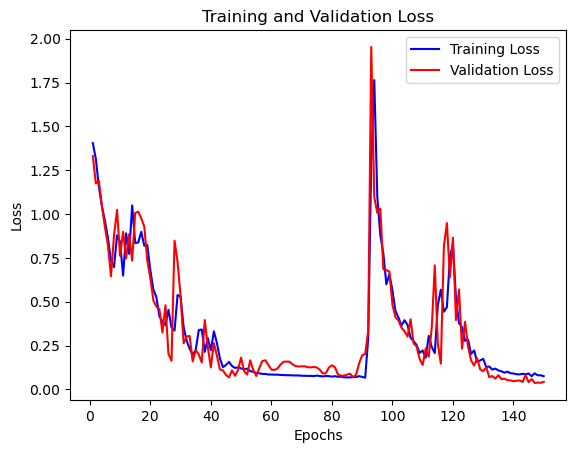

In [36]:
# Plota as curvas de perda
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

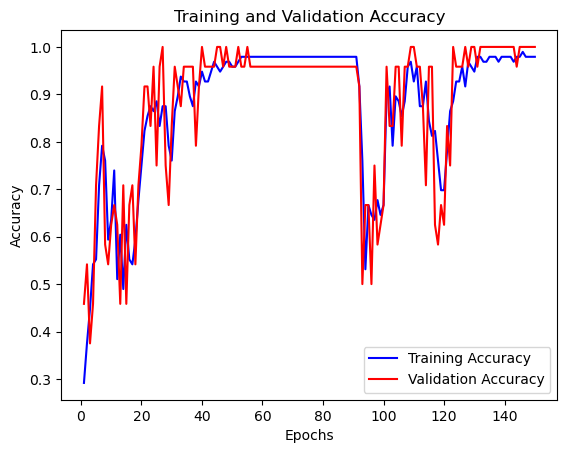

In [37]:
plt.plot(epochs, train_acuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_acuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Avalie o modelo nos dados de teste
test_accuracy = model.evaluate(X_test, y_test, verbose=1)[1]

# Imprima a acurácia nos dados de teste
print("Acurácia nos dados de Validação:", test_accuracy)

1/1 [==============================] - 0s 32ms/step - loss: 0.0430 - categorical_accuracy: 1.0000
Acurácia nos dados de Validação: 1.0


1/1 [==============================] - 1s 706ms/step


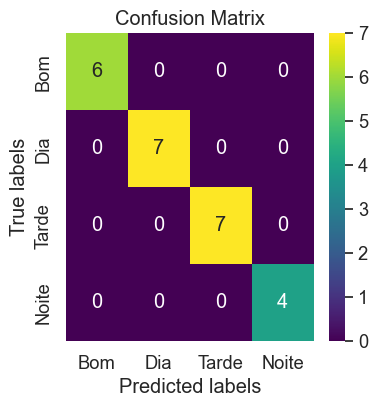

In [39]:
#Matriz de confusão

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap='viridis', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

probabilidades = model.predict(X_test)
y_predito = np.argmax(probabilidades, axis=1)
y_test_num = np.argmax(y_test, axis=1)
class_names = ['Bom','Dia','Tarde','Noite']


# Plot confusion matrix
plot_confusion_matrix(y_test_num, y_predito, class_names)

### 9 - Salvando o Modelo ###

In [7]:
import pickle

In [ ]:
pickle.dump( model, open('libras_lstm_model.pkl', 'wb'))

In [8]:
loaded_pickle_model = pickle.load(open('libras_lstm_model.pkl', 'rb'))

### 10 - Realizando Inferência em Tempo Real ###

#### Carrega as dependências e funções necessárias para detecção ####

In [40]:
import cv2
import numpy as np
import mediapipe as mp
import pickle

mp_holistic = mp.solutions.holistic #Modelo Mediapipe Holistic
mp_drawing = mp.solutions.drawing_utils #Plota ferramentas

#Função de detecção da imagem 
def mediapipe_detector(imagem, model):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) #Converte BGR paara RGB
    imagem.flags.writeable = False                  #Torna a imagem não editável ( economia de memória)
    results = model.process(imagem)                 # Faz a predição
    imagem.flags.writeable = True                   # Torna a imagem editável
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR) #Reconverte RGB paara BGR(CV2)
    return imagem, results

#Função detecta as coordenadas dos pontos chave e os transforma em um array único de 1662 valores ( os não encontrados são preenchidos com valor 0)
def extrai_valores_chave(resultado):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in resultado.pose_landmarks.landmark]).flatten() if resultado.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in resultado.face_landmarks.landmark]).flatten() if resultado.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in resultado.left_hand_landmarks.landmark]).flatten() if resultado.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in resultado.right_hand_landmarks.landmark]).flatten() if resultado.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

#Carrega o modelo 
loaded_pickle_model = pickle.load(open('libras_lstm_model.pkl', 'rb'))

#Gestos que serão detectados
gestos = np.array(['bom', 'dia', 'tarde','noite'])

#Mostra as palavras possíveis no canto esquerdo com uma barra de probabilidade ( Bom para )
cores = [(245,117,16), (117,245,16), (16,117,245), (245,16,117)]
def prob_viz(res, gestos, input_frame, cores):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), cores[num], -1)
        cv2.putText (output_frame, gestos[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return output_frame

In [41]:
#Testando as detecções em tempo real 
#Novas variáveis
sequencia = []
sentenca = []
deteccoes = []
threshold = 0.7

#### Executa a Detecção dos Gestos ####

In [5]:
captura = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while captura.isOpened():
        ret, frame = captura.read()
        imagem, resultado = mediapipe_detector(frame, holistic)
        #print(resultado)
        #renderiza_landmarks(imagem,resultado)

        #Lógica de Predição
        pontos = extrai_valores_chave(resultado)
        sequencia.append(pontos)
        sequencia = sequencia[-30:]
        

        if len(sequencia)==30:
            previsao = loaded_pickle_model.predict(np.expand_dims(sequencia, axis=0))[0]
            #print(gestos[np.argmax(previsao)])
            deteccoes.append(np.argmax(previsao))

            #Lógica de visualização
            if np.unique(deteccoes[-10:])[0]==np.argmax(previsao):
                if previsao[np.argmax(previsao)] > threshold:

                    if len(sentenca) > 0:
                        if gestos[np.argmax(previsao)] != sentenca[-1]:
                            sentenca.append(gestos[np.argmax(previsao)])
                    else:
                        sentenca.append(gestos[np.argmax(previsao)])
                   
            if len(sentenca) > 5:
                sentenca = sentenca[-5:]

        if len(sequencia)>=30:
            #Imagem com as probabilidades 
            imagem = prob_viz( previsao, gestos, imagem, cores)
            print(np.argmax(previsao))

        cv2.rectangle(imagem, (0,0), (640,40), (245, 117, 16), -1)
        cv2.putText(imagem, ' '.join(sentenca), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        #Mostra a janela
        cv2.imshow('Janela OpenCV', imagem)
        #Para a execução da câmera
        if cv2.waitKey(10) & 0xFF == ord('q'): #Para sair aperte Q
            break


    captura.release()
    cv2.destroyAllWindows()    


1/1 [==============================] - 1s 698ms/step
1
1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 23ms/step
1
1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 26ms/step
1
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 34ms/step
0
1/1 [==============================] - 0s 23ms/step
0
1/1 [==============================] - 0s 22ms/step
0
1/1 [==============================] - 0s 20ms/step
0
1/1 [======================

#### Plota a última imagem capturada com as palavras detectadas ####

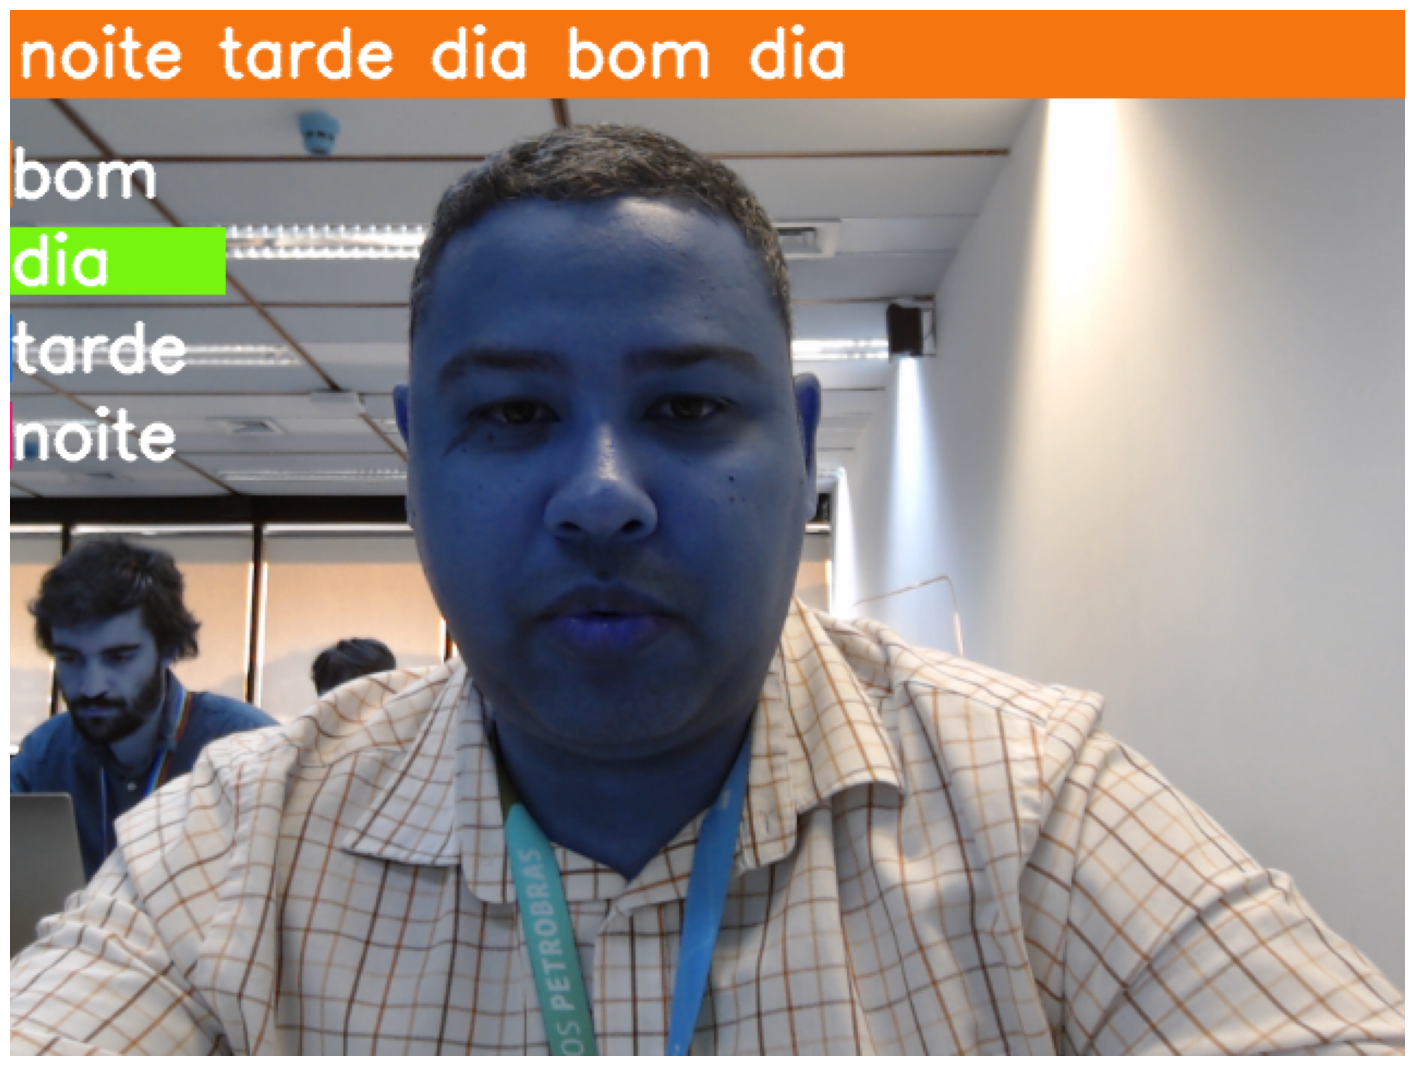

In [13]:
imagem_plot = prob_viz(previsao, gestos, imagem, cores)

plt.figure(figsize=(18, 18))
plt.imshow(imagem_plot)
plt.axis('off')  # Desativar eixos para melhor visualização
plt.show()